In [1]:
import time, os, json, sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from operator import is_not
from functools import partial
%matplotlib inline

In [2]:
def regressionLoss(y_pred, y_true, metric = 'RAE', outlier_filter = False, outlier_thres = 20):
    metric = metric.lower()
    if outlier_filter:
        std = regressionLoss(y_pred, y_true, 'RMSE', False)
        outlier_flag = (np.abs(y_pred - y_true) > std*outlier_thres)
        num_outlier = np.sum(outlier_flag)
        return regressionLoss(y_pred[~outlier_flag], y_true[~outlier_flag], metric, False), num_outlier

    y_true, y_pred = np.array(y_true).reshape(-1), np.array(y_pred).reshape(-1)
    y_mean = y_true.mean()
    if metric == 'rae':
        return sum(abs(y_pred - y_true)) / sum(abs(y_mean - y_true))
    elif metric == 'rse':
        return sum((y_pred - y_true)**2) / sum((y_mean - y_true)**2)
    elif metric == 'rmse':
        return ((y_pred - y_true)**2).mean()**.5
    elif metric == 'r square':
        sst = sum((y_true - y_mean) ** 2)
        ssr = sum((y_true - y_pred) ** 2)
        return 1 - ssr/sst

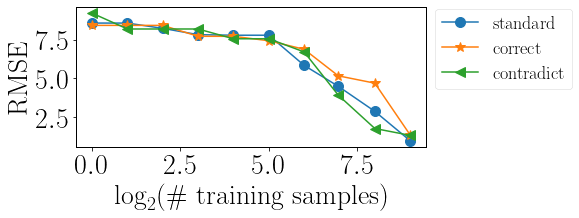

In [13]:
file_list = {}

n_list = [1,2, 4, 8, 16, 32, 64, 125, 256, 512] # 
mode_list = ['standard', 'correct', 'contradict']
folder_list = ['data_2', 'data_4', 'data_6']
        
width = 6
height = 3

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

####
markers = ['o', '*', '<']

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.16, bottom=.3, right=0.97, top=0.95, wspace=0.2) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure


for i in range(len(mode_list)):
    mode = mode_list[i]
    file_list[mode] = []
    rmse = []
    min_rmse = np.inf
    for n in n_list:
        filename = "linear_%s_n_%d_p_2_int_0_(-10.0,10.0)_noise_0.00_all.json" % (mode, n+50)
        file_list[mode].append(filename)
        rmse_l = np.zeros(len(folder_list))
        for j in range(len(folder_list)):
            folder = folder_list[j]
            with open(os.path.join(folder, filename), 'r') as f:
                data_json = json.load(f)
            gpt3_test_y = np.array(data_json['gptj_test_y'])
            invalid_idx = gpt3_test_y == None
            test_y = np.array(data_json['test_y'])
            rmse_l[j] = regressionLoss(gpt3_test_y[~invalid_idx], test_y[~invalid_idx], 'rmse', True, 5)[0]
        min_rmse = min(rmse_l.mean(), min_rmse)
        rmse.append(min_rmse)
    plt.plot(np.log2(np.array(n_list)), rmse, label = mode, marker = markers[i], markersize = 10)
    #df_plot.plot(x = 'log_2n', y = 'rmse', ax = ax, label = mode, marker = markers[i], markersize = 10)   
ax.legend(fontsize = 18, bbox_to_anchor = (1, 1.05))
plt.xlabel(r'$\log_2$(\# training samples)')
# plt.xlabel(r'\# training samples')
plt.ylabel('RMSE')
plt.savefig('contradict_gptj.pdf')
None

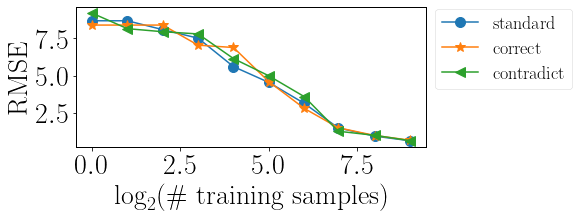

In [14]:
file_list = {}

n_list = [1,2, 4, 8, 16, 32, 64, 125, 256, 512] # 
mode_list = ['standard', 'correct', 'contradict']
folder_list = ['data_2', 'data_4', 'data_6']
        
width = 6
height = 3

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

####
markers = ['o', '*', '<']

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.16, bottom=.3, right=0.97, top=0.95, wspace=0.2) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure


for i in range(len(mode_list)):
    mode = mode_list[i]
    file_list[mode] = []
    rmse = []
    min_rmse = np.inf
    for n in n_list:
        filename = "linear_%s_n_%d_p_2_int_0_(-10.0,10.0)_noise_0.00_all.json" % (mode, n+50)
        file_list[mode].append(filename)
        rmse_l = np.zeros(len(folder_list))
        for j in range(len(folder_list)):
            folder = folder_list[j]
            with open(os.path.join(folder, filename), 'r') as f:
                data_json = json.load(f)
            gpt3_test_y = np.array(data_json['gpt3_test_y'])
            invalid_idx = gpt3_test_y == None
            test_y = np.array(data_json['test_y'])
            rmse_l[j] = regressionLoss(gpt3_test_y[~invalid_idx], test_y[~invalid_idx], 'rmse', True, 5)[0]
        min_rmse = min(rmse_l.mean(), min_rmse)
        rmse.append(min_rmse)
    plt.plot(np.log2(np.array(n_list)), rmse, label = mode, marker = markers[i], markersize = 10)
    # df_plot.plot(x = 'log_2n', y = 'rmse', ax = ax, label = mode, marker = markers[i], markersize = 10)   
ax.legend(fontsize = 18, bbox_to_anchor = (1, 1.05))
plt.xlabel(r'$\log_2$(\# training samples)')
# plt.xlabel(r'\# training samples')
plt.ylabel('RMSE')
plt.savefig('contradict_gpt3.pdf')
None

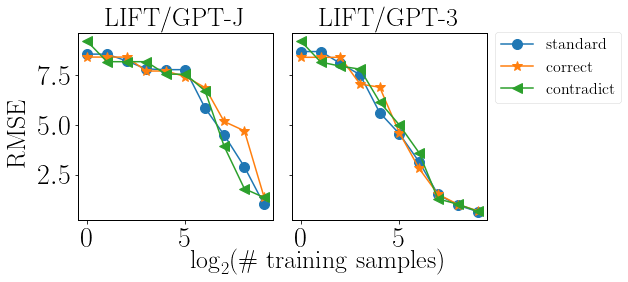

In [31]:
file_list = {}

n_list = [1,2, 4, 8, 16, 32, 64, 125, 256, 512] # 
mode_list = ['standard', 'correct', 'contradict']
folder_list = ['data_2', 'data_4', 'data_6']
        
width = 9
height = 4

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

####
markers = ['o', '*', '<']

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.13, bottom=.2, right=0.76, top=0.85, wspace=0.1) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure


for i in range(len(mode_list)):
    mode = mode_list[i]
    file_list[mode] = []
    rmse_gpt3, rmse_gptj = [], []
    min_rmse_gptj, min_rmse_gpt3 = np.inf, np.inf
    for n in n_list:
        filename = "linear_%s_n_%d_p_2_int_0_(-10.0,10.0)_noise_0.00_all.json" % (mode, n+50)
        file_list[mode].append(filename)
        rmse_l_gptj = np.zeros(len(folder_list))
        rmse_l_gpt3 = np.zeros(len(folder_list))
        for j in range(len(folder_list)):
            folder = folder_list[j]
            with open(os.path.join(folder, filename), 'r') as f:
                data_json = json.load(f)
            gptj_test_y = np.array(data_json['gptj_test_y'])
            gpt3_test_y = np.array(data_json['gpt3_test_y'])
            invalid_idx = gpt3_test_y == None
            test_y = np.array(data_json['test_y'])
            rmse_l_gpt3[j] = regressionLoss(gpt3_test_y[~invalid_idx], test_y[~invalid_idx], 'rmse', True, 5)[0]
            rmse_l_gptj[j] = regressionLoss(gptj_test_y, test_y, 'rmse', True, 5)[0]
        min_rmse_gptj = min(rmse_l_gptj.mean(), min_rmse_gptj)
        min_rmse_gpt3 = min(rmse_l_gpt3.mean(), min_rmse_gpt3)
        rmse_gpt3.append(min_rmse_gpt3)
        rmse_gptj.append(min_rmse_gptj)
    ax[1].plot(np.log2(np.array(n_list)), rmse_gpt3, label = mode, marker = markers[i], markersize = 10)
    ax[0].plot(np.log2(np.array(n_list)), rmse_gptj, label = mode, marker = markers[i], markersize = 10)
    #df_plot.plot(x = 'log_2n', y = 'rmse', ax = ax, label = mode, marker = markers[i], markersize = 10)   
ax[1].legend(fontsize = 16, bbox_to_anchor = (1, 1.05))
ax[0].set_title('LIFT/GPT-J', fontsize = 26)
ax[1].set_title('LIFT/GPT-3', fontsize = 26)
fig.supxlabel(r'$\log_2$(\# training samples)', fontsize = 26)
# plt.xlabel(r'\# training samples')
fig.supylabel('RMSE', fontsize = 26)
plt.savefig('contradict.pdf')
None